# Movies 3

## Introduction

Une base de données (hébergée dans le cloud AWS) contenant un certain nombre de données cinématographiques vous est fournie pour exploration et mise en pratique des langages SQL et Python.  
Les données de connexion (user, host) sont indiquées dans le brief, le mot de passe nécessaire est précisé en session par le formateur.  


## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

La base de donnée " Movies" est composée de 4 tables :

   - movies avec pour clef primaire id.
   
   - countries avec pour clef primaire code.
   
   - artists avec pour clef primaire id.
   
   - role avec pour clef primaire movieId et actorId.

Ces tables comportes des relations :

  - Pour la table movies et countries , countrycode et countries.code.
  
  - Pour la table movies et artists, directorId et artist.id.
  
  - Pour la table artists et roles, artists.id et roles.actorId.
  
  - Pour la table roles et movies, roles.movieId et movies.id.
  

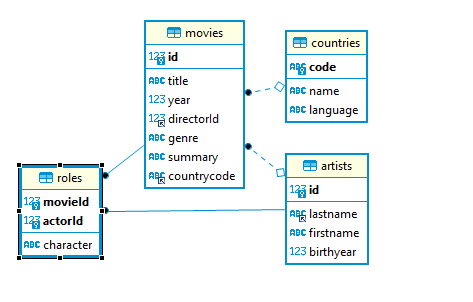

In [92]:
from IPython.display import Image
Image("Img/diagram.PNG")

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [1]:
import os
import pandas as pd

In [2]:
from sqlalchemy import create_engine
import pymysql

In [3]:
# paramètres de connexion à la base de données movies (MySQL sous AWS RDS)
user = os.environ.get('movies3_user')
password = os.environ.get('movies3_psw') 
host = os.environ.get('movies3_host')  
port = 3306
dbname = 'movies'  

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{dbname}")

In [4]:
print(user)

student


### Exemples

#### Tables de base

In [5]:
movies = pd.read_sql_query("SELECT * FROM movies LIMIT 10", engine)
movies.head()

,id,title,year,directorId,genre,summary,countrycode
0,11,La Guerre des étoiles,1977,1,Aventure,"Il y a bien longtemps, dans une galaxie très l...",US
1,24,Kill Bill : Volume 1,2003,138,Action,Au cours d'une cérémonie de mariage en plein d...,US
2,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
3,33,Impitoyable,1992,190,Western,"Après avoir été un impitoyable tueur, toujours...",US
4,38,Eternal Sunshine of the Spotless Mind,2004,201,Science-Fiction,Joël et Clémentine ne voient plus que les mauv...,US


In [6]:
artists = pd.read_sql_query("SELECT * FROM artists LIMIT 10", engine)
artists.head()

,id,lastname,firstname,birthyear
0,1,Lucas,George,1944
1,2,Hamill,Mark,1951
2,3,Ford,Harrison,1942
3,4,Fisher,Carrie,1956
4,5,Cushing,Peter,1913


In [7]:
roles = pd.read_sql_query("SELECT * FROM roles LIMIT 10", engine)
roles.head()

,movieId,actorId,character
0,11,2,Luke Skywalker
1,1891,2,Luke Skywalker
2,1892,2,Luke Skywalker
3,181808,2,Luke Skywalker / Dobbu Scay (voice)
4,11,3,Han Solo


In [8]:
countries = pd.read_sql_query("SELECT * FROM countries LIMIT 10", engine)
countries.head()

,code,name,language
0,AU,Australia,
1,BE,Belgium,
2,BS,Bahamas,
3,CA,Canada,
4,CN,China,


#### Autre requête simple
Q00: Nom et année de naissance des artistes nés après 1975 ? Combien sont-ils ?

In [16]:
sql_query_00 = """
    SELECT *
    FROM artists
    WHERE birthyear > 1975
"""

results = pd.read_sql_query(sql_query_00, engine)
results.head(5)

,id,lastname,firstname,birthyear
0,131,Gyllenhaal,Jake,1980
1,205,Dunst,Kirsten,1982
2,225,Holmes,Ashton,1978
3,258,García Bernal,Gael,1978
4,368,Witherspoon,Reese,1976


In [17]:
results.shape

(118, 4)

In [18]:
len(results)

118

### Questions

Q01: Quels sont les films de type 'Drame' ? Combien cela représente de films ?  

In [28]:
q1 ="""
SELECT *
FROM movies
WHERE genre="Drame";
"""


sql1 = pd.read_sql_query(q1,engine)

sql1

,id,title,year,directorId,genre,summary,countrycode
0,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
1,59,A History of Violence,2005,224,Drame,"Tom Stall, un père de famille à la vie paisibl...",US
2,116,Match point,2005,1243,Drame,Jeune professeur de tennis issu d'un milieu mo...,US
3,142,Le Secret de Brokeback Mountain,2005,1614,Drame,"Eté 1963, Wyoming.Deux jeunes cow-boys, Jack e...",CA
4,145,Breaking the Waves,1996,42,Drame,Au début des années soixante-dix sur la côte n...,DK
...,...,...,...,...,...,...,...
78,453352,Une vie violente,2017,550418,Drame,"Malgré la menace de mort qui pèse sur sa tête,...",FR
79,485162,En guerre,2018,7288,Drame,Malgré de lourds sacrifices financiers de la p...,FR
80,485166,Amanda,2018,931581,Drame,"Paris, de nos jours. David, la vingtaine, vit ...",FR
81,490132,Green Book : Sur les routes du sud,2018,7396,Drame,"En 1962, alors que règne la ségrégation, Tony ...",US


In [29]:
len(sql1)

83

Q02: Quels rôles a joué Bruce Willis et dans quels films (triés par ordre chronologique) ?

In [35]:
q2 = """
SELECT title,`CHARACTER`, year
FROM movies
INNER JOIN roles 
    ON movies.id = roles.movieId
INNER JOIN artists 
    ON roles.actorId = artists.id
WHERE firstname = "Bruce" 
    AND lastname = "Willis"
ORDER BY year ASC;
"""

sql2 = pd.read_sql_query(q2,engine)

sql2

,title,CHARACTER,year
0,Piège de cristal,John McClane,1988
1,58 minutes pour vivre,John McClane,1990
2,Pulp Fiction,Butch Coolidge,1994
3,Une Journée en enfer,John McClane,1995
4,Die Hard 4 : Retour en enfer,John McClane,2007


Q03: Qui est le réalisateur de Memento ?

In [39]:
q3 = """
SELECT title, lastname, firstname 
FROM movies
INNER join artists
    ON artists.Id = directorId
WHERE title = "memento"
"""

sql3 = pd.read_sql_query(q3,engine)

sql3

,title,lastname,firstname
0,Memento,Nolan,Christopher


Q04: Qui a joué le rôle de Chewbacca et dans quels films ?

In [41]:
q4 = """
SELECT title, firstname, lastname
from movies
INNER JOIN roles
    ON movies.id = roles.movieId
INNER JOIN artists 
    ON roles.actorId = artists.Id
Where `character` = "Chewbacca";
"""
sql4 = pd.read_sql_query(q4,engine)

sql4

,title,firstname,lastname
0,La Guerre des étoiles,Peter,Mayhew
1,L'Empire contre-attaque,Peter,Mayhew
2,Le Retour du Jedi,Peter,Mayhew
3,Star Wars : Le Réveil de la Force,Peter,Mayhew
4,Star Wars : Les Derniers Jedi,Joonas,Suotamo


Q05: Dans quels films Bruce Willis a-t-il joué le role de John McClane ? 

In [44]:
q5 = """
SELECT title, firstname, lastname
from movies
INNER JOIN roles
    ON movies.id = roles.movieId
INNER JOIN artists 
    ON roles.actorId = artists.Id
Where firstname ="Bruce"
    AND lastname = "Willis"
    AND `character` = "John McClane";
"""

sql5 = pd.read_sql_query(q5,engine)

sql5

,title,firstname,lastname
0,Piège de cristal,Bruce,Willis
1,Die Hard 4 : Retour en enfer,Bruce,Willis
2,Une Journée en enfer,Bruce,Willis
3,58 minutes pour vivre,Bruce,Willis


Q06: Quels sont les acteurs de 'Sueurs froides' ?

In [54]:
q6 = """
SELECT title, firstname, lastname
FROM movies
INNER JOIN roles
    ON movies.Id = roles.movieId
INNER JOIN artists
    ON roles.actorId = artists.ID
WHERE title = "Sueurs froides";
"""

sql6 = pd.read_sql_query(q6,engine)

sql6

,title,firstname,lastname
0,Sueurs froides,James,Stewart
1,Sueurs froides,Kim,Novak
2,Sueurs froides,Barbara,Bel Geddes


Q07: Quels sont les films dont le réalisateur est Tim Burton, et l’un des acteurs Johnny Depp ?

In [67]:
q7 = """
SELECT title, firstname, lastname 
FROM movies  
INNER JOIN artists
    ON movies.directorId = artists.Id
WHERE firstname = "Tim"
    AND lastname = "Burton";
"""
sql7 = pd.read_sql_query(q7,engine)

sql7

,title,firstname,lastname
0,"Sleepy Hollow, La Légende du cavalier sans tête",Tim,Burton


In [69]:
q7bis = """
SELECT title, `character` firstname, lastname 
FROM movies  
INNER JOIN roles
    ON movies.id = roles.movieId
INNER JOIN artists 
    ON roles.actorId = artists.Id
WHERE firstname = "Johnny"
    AND lastname = "Depp";
"""

sql7bis = pd.read_sql_query(q7bis,engine)

sql7bis

,title,firstname,lastname
0,"Sleepy Hollow, La Légende du cavalier sans tête",Ichabod Crane,Depp


##### On peut en déduire que le films Sleepy Hollow est commun au deux personnes.

Q08: Quels sont les films dans lesquels a joué Woody Allen ? Donnez aussi le rôle.

In [70]:
q8 = """
SELECT title, `character`, firstname, lastname 
FROM movies  
INNER JOIN roles
    ON movies.id = roles.movieId
INNER JOIN artists 
    ON roles.actorId = artists.Id
WHERE firstname = "Woody"
    AND lastname = "Allen";
"""
sql8 = pd.read_sql_query(q8,engine)

sql8

,title,character,firstname,lastname
0,Scoop,Sid Waterman,Woody,Allen
1,Manhattan,Isaac Davis,Woody,Allen
2,Annie Hall,Alvy Singer,Woody,Allen
3,Maris et femmes,Prof. Gabriel 'Gabe' Roth,Woody,Allen


Q09: Quel metteur en scène a tourné dans ses propres films ? Donnez le nom, le rôle et le titre des films en question.

In [72]:
q9 = """
SELECT title, `character`, firstname, lastname
FROM movies
INNER JOIN roles
    ON movies.id = roles.movieId
INNER JOIN artists 
    ON roles.actorId = artists.id
WHERE roles.actorId = movies.directorId;
"""
sql9 = pd.read_sql_query(q9,engine)

sql9

,title,character,firstname,lastname
0,Impitoyable,Bill Munny,Clint,Eastwood
1,Reservoir Dogs,Mr. Brown,Quentin,Tarantino
2,Scoop,Sid Waterman,Woody,Allen
3,Pulp Fiction,Jimmie Dimmick,Quentin,Tarantino
4,Manhattan,Isaac Davis,Woody,Allen
5,Annie Hall,Alvy Singer,Woody,Allen
6,Chantons sous la pluie,Don Lockwood,Gene,Kelly
7,Le dictateur,"Adenoid Hynkel, Dictator of Tomania / A Jewish...",Charlie,Chaplin
8,Le Bal des vampires,"Alfred, Assistent des Professors",Roman,Polanski
9,Les temps modernes,A factory worker,Charlie,Chaplin


Q10: Quels sont les films de Quentin Tarantino dans lesquels il n’a pas joué 

In [ ]:
q10 = """

"""

sql10 = pd.read_sql_query(q10,engine)

sql10

Q11: Quel metteur en scène a tourné en tant qu’acteur ? Donner le nom, le rôle et le titre des films dans lesquels cet artiste a joué.

Q12: Quels sont les films de Hitchcock sans James Stewart

Q13: Quel est la filmographie de James Stewart ?

In [94]:
q13 = """
SELECT title, firstname, lastname
FROM movies
INNER JOIN roles
    ON movies.id = roles.movieId
INNER JOIN artists 
    ON roles.actorId = artists.Id
WHERE firstname = "James"
    AND lastname = "Stewart"
"""
sql13 = pd.read_sql_query(q13,engine)

sql13


,title,firstname,lastname
0,Sueurs froides,James,Stewart
1,Fenêtre sur cour,James,Stewart
2,L'homme qui en savait trop,James,Stewart


Q14: Quels sont les films sans rôle (acteurs) ?

Q15: Combien d'acteurs n’ont jamais réalisé de film ? 

Q16: Donnez les noms et prénoms des 10 réalisateurs les plus prolifiques, ainsi que le nombre de films qu’ils ont tournés ?

In [73]:
q16 = """
SELECT count(title) as Movies, firstname, lastname
from movies
INNER JOIN artists
    ON movies.directorId = artists.id
GROUP BY directorId
ORDER BY count(title) DESC
LIMIT 10;
"""
sql16 = pd.read_sql_query(q16,engine)

sql16

,Movies,firstname,lastname
0,13,Steven,Spielberg
1,10,Alfred,Hitchcock
2,8,Woody,Allen
3,7,Quentin,Tarantino
4,7,Stanley,Kubrick
5,6,Francis,Ford Coppola
6,6,Christopher,Nolan
7,6,Ridley,Scott
8,6,Roman,Polanski
9,5,George,Lucas


Q17: Donnez les noms et prénoms des réalisateurs qui ont tourné au moins deux films. Combien sont-ils ?

In [96]:
"""q17 = 
SELECT count(movies.id) as Movies, firstname, lastname
from movies
INNER JOIN artists
    ON movies.directorId = artists.id
WHERE count(movies.id) >= 2
GROUP BY directorId
ORDER BY Movies DESC;

 sql17 = pd.read_sql_query(q17,engine)

sql17 """

'q17 = \nSELECT count(movies.id) as Movies, firstname, lastname\nfrom movies\nINNER JOIN artists\n    ON movies.directorId = artists.id\nWHERE count(movies.id) >= 2\nGROUP BY directorId\nORDER BY Movies DESC;\n\n sql17 = pd.read_sql_query(q17,engine)\n\nsql17 '

Q18: Dans quels films le réalisateur a-t-il le même prénom que l’un des interprètes ? (titre, nom du réalisateur, nom de l’interprète). Le réalisateur et l’interprète ne doivent pas être la même personne.

Q19: Quels sont les 10 pays produisant le plus de films ?

Q20: Quels sont les 5 acteurs ayant le plus joué dans des films français ?

---

## 3. Expression libre

A vous de jouer ! Tentez quelques requêtes de votre choix (avec pourquoi pas quelques graphiques illustratifs en utilisant Matplotlib...)